# Data Cleaning

In [58]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/raw_survey_data_2022.csv',header=1)

from datetime import datetime

data1=df.iloc[:,1] #DataFrame with start time
data2=df.iloc[:,2] #DataFrame with end time
data3=df.iloc[:,3:] #DataFrame with data

data3["time"]=data2.apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))-data1.apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
#(data1.iloc[:,1].values.astype('datetime64[D]')-data1.iloc[:,0].values.astype('datetime64[D]'))

                                                                                                    
index_time= data3["time"].apply(lambda x: x/np.timedelta64(1, 's'))

data3['clean']=(index_time>200)&(data3.iloc[:,176-3]=='2')&(data3.iloc[:,306-3]=='4')

df=data3.loc[data3.clean==True].iloc[:,:-2]
df.shape

n = 1271

In [3]:
df.head(10)

,Response,Academics,Mental health,Physical health,Professional development,Social life,Career Placement Team,Housing,Intercampus Shuttle/Via Service,Library services,...,Prefer to self-describe,Response.51,Response.52,Other (please specify).8,Response.53,Other (please specify).9,Response.54,Response.55,Response.56,Open-Ended Response.15
0,Agree,Strongly agree,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,...,NaN,No,Multiracial background,NaN,Jamaica (NA),NaN,less than 18,Yes,Yes,NaN
2,Disagree,Disagree,Disagree,Agree,Agree,Agree,Neither agree nor disagree,Agree,Strongly agree,Agree,...,NaN,No,South Asian,NaN,India (AS),NaN,21-23,Yes,Yes,NaN
5,Agree,Strongly agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Disagree,Agree,...,NaN,No,East Asian,NaN,NaN,NaN,21-23,No,Yes,NaN
6,Agree,Disagree,Disagree,Neither agree nor disagree,Strongly agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,NaN,No,Multiracial background,NaN,Guyana (SA),NaN,21-23,Yes,Yes,Maybe Professors can be a little more flexible...
7,Neither agree or disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Strongly agree,Neither agree nor disagree,Strongly disagree,Agree,Neither agree nor disagree,...,NaN,I prefer not to answer,East Asian,NaN,China (AS),NaN,24-26,No,No,NaN
8,Agree,Agree,Agree,Agree,Agree,Neither agree nor disagree,Disagree,Disagree,Neither agree nor disagree,Strongly agree,...,NaN,No,NaN,NaN,NaN,NaN,21-23,No,Yes,NaN
9,Neither agree or disagree,Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,NaN,No,NaN,NaN,NaN,NaN,21-23,No,No,NaN
10,Disagree,Strongly agree,Neither agree nor disagree,Agree,Disagree,Strongly agree,Disagree,Neither agree nor disagree,Strongly agree,Agree,...,NaN,No,East Asian,NaN,China (AS),NaN,21-23,Yes,Yes,DO A better job for cs departments career serv...
11,Agree,Agree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Strongly agree,Strongly agree,...,NaN,No,East Asian,NaN,China (AS),NaN,24-26,No,No,NaN
12,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,...,NaN,No,East Asian,NaN,China (AS),NaN,24-26,No,No,NaN


# Overview - Demographics

## Gender

In [4]:
gender = df[["Female", "Male", "Non-binary", "Do not identify as female, male, or non-binary", 
             "I prefer not to answer", "Prefer to self-describe"]]

gender.dropna(how="all")
print(gender.count())

Female                                            479
Male                                              705
Non-binary                                         15
Do not identify as female, male, or non-binary      1
I prefer not to answer                             45
Prefer to self-describe                             2
dtype: int64


In [5]:
gender["Prefer to self-describe"].value_counts()

i am a plate    1
-               1
Name: Prefer to self-describe, dtype: int64

<AxesSubplot:ylabel='None'>

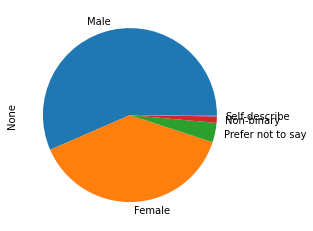

In [6]:
gender_plot = pd.Series([705, 479, 45, 15, 3], 
                        index=["Male", "Female", "Prefer not to say", "Non-binary", "Self-describe"])
gender_plot.plot(kind="pie")

<AxesSubplot:ylabel='None'>

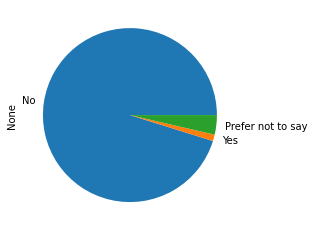

In [7]:
LGBTQ_plot = pd.Series([1184, 15, 45], index=["No", "Yes", "Prefer not to say"])
LGBTQ_plot.plot(kind="pie")

In [23]:
# merge to one column
df.loc[df.Female.notna(), 'gender'] = 'Female'
df.loc[df.Male.notna(),'gender'] = 'Male'
df.loc[df['Non-binary'].notna(),'gender'] = 'Non-binary'
df.loc[df['I prefer not to answer'].notna(),'gender'] = 'Not to say'

df.drop(["Female", "Male", "Non-binary", "Do not identify as female, male, or non-binary", 
         "I prefer not to answer", "Prefer to self-describe"], axis=1)
df.gender.value_counts()

Male          701
Female        477
Not to say     45
Non-binary     15
Name: gender, dtype: int64

## Degree

In [70]:
degree = df.iloc[:, 68]
print(degree.value_counts() / 1271)
print(degree.value_counts())

# df.columns.values[68] = "degree"
# can't access a column with the new name after 'renaming'
df = df.rename(columns={df.columns.tolist()[68]:'degree'});

Master of Science (M.S.)        0.777341
Doctor of Philosophy (Ph.D.)    0.163651
M.S. leading to Ph.D.           0.058222
Professional Degree             0.000787
Name: degree, dtype: float64
Master of Science (M.S.)        988
Doctor of Philosophy (Ph.D.)    208
M.S. leading to Ph.D.            74
Professional Degree               1
Name: degree, dtype: int64


## Department

In [60]:
df = df.rename(columns={df.columns.tolist()[67]:'department'})

df.department.value_counts()

Industrial Engineering and Operations Research    314
Computer Science                                  274
Electrical Engineering                            148
Biomedical Engineering                            138
Mechanical Engineering                             95
Data Science Institute                             76
Chemical Engineering                               68
Civil Engineering and Engineering Mechanics        62
Applied Physics and Applied Mathematics            58
Earth and Environmental Engineering                29
I prefer not to answer.                             9
Name: department, dtype: int64

## Semesters

In [62]:
df = df.rename(columns={df.columns.tolist()[66]:'semester'})

df.semester.value_counts()

2 semesters                446
1 semester                 430
3 semesters                177
4 semesters                 47
10 semesters or more        35
5 semesters                 29
7 semesters                 29
less than 1                 27
6 semesters                 19
8 semesters                 16
9 semesters                 13
I prefer not to answer.      3
Name: semester, dtype: int64

## Add labels 

# Housing

In [63]:
housing = df.iloc[:, 274:296]
housing.head(10)

,Response.35,Response.36,Response.37,Open-Ended Response.12,Helpfulness of building superintendent,Helpfulness of door attendant,Apartment renovations,"Building maintenance (regular cleaning, intercoms, elevators, etc.)",Building Security,Cost.1,...,Unavailability of Columbia Residential units,Housing cost,Housing location,Choice of accommodation(s),Choice of roommate(s),Not Applicable,Other (please specify).5,Response.39,Response.40,Open-Ended Response.13
0,Off-campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Housing cost,Housing location,NaN,NaN,NaN,NaN,I did not use their service,Agree,NaN
2,Off-campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unavailability of Columbia Residential units,Housing cost,NaN,NaN,Choice of roommate(s),NaN,NaN,Agree,Strongly disagree,NaN
5,Columbia Residential (formerly known as Univer...,Disagree,Neither agree nor disagree,NaN,Agree,Neither agree nor disagree,Strongly disagree,Disagree,Disagree,Strongly agree,...,NaN,NaN,NaN,NaN,NaN,Not Applicable,NaN,I did not use their service,Agree,NaN
6,Off-campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Not Applicable,NaN,I did not use their service,Disagree,NaN
7,Off-campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unavailability of Columbia Residential units,NaN,NaN,NaN,NaN,NaN,NaN,I did not use their service,Disagree,NaN
8,Off-campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unavailability of Columbia Residential units,NaN,Housing location,NaN,NaN,NaN,NaN,I did not use their service,Agree,NaN
9,Off-campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Housing location,Choice of accommodation(s),Choice of roommate(s),NaN,NaN,I did not use their service,Neither agree nor disagree,NaN
10,Off-campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Not Applicable,NaN,I did not use their service,Neither agree nor disagree,NaN
11,Columbia Residential (formerly known as Univer...,Agree,Neither agree nor disagree,NaN,Agree,Agree,Disagree,Agree,Agree,Neither agree nor disagree,...,NaN,NaN,NaN,NaN,NaN,Not Applicable,NaN,I did not use their service,Neither agree nor disagree,NaN
12,Off-campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Unavailability of Columbia Residential units,Housing cost,NaN,NaN,NaN,NaN,NaN,Agree,Agree,NaN


### Location

In [83]:
df = df.rename(columns={df.columns.tolist()[274]:'location'})

print(df.location.value_counts() / n)
print(df.location.value_counts())

print("\nMasters:")
print(df.loc[df['degree']=='Master of Science (M.S.)', 'location'].value_counts() / 988)

print("\nPhD:")
print(df.loc[df['degree']=='Doctor of Philosophy (Ph.D.)', 'location'].value_counts() / 208)

print("\nOff-campus:")
print(df.loc[df['location']=='Off-campus', 'degree'].value_counts() / 867)

print("\n:")
print(df.loc[df['location']=='Columbia Residential (formerly known as University Apartment Housing (UAH))', 
             'degree'].value_counts() / 364)

Off-campus                                                                     0.682140
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.286389
International House                                                            0.031471
Name: location, dtype: float64
Off-campus                                                                     867
Columbia Residential (formerly known as University Apartment Housing (UAH))    364
International House                                                             40
Name: location, dtype: int64

Masters:
Off-campus                                                                     0.781377
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.182186
International House                                                            0.036437
Name: location, dtype: float64

PhD:
Columbia Residential (formerly known as University Apartment Housing (UAH))    0.658654
Off-campus                  

In [ ]:
# Satisfaction with Columbia Residential
